In [1]:
import gym 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
 
# For animation 
from IPython.display import clear_output
from time import sleep

In [88]:
class Agent_taxi: 
    def __init__(self, method, start_alpha = 0.3, start_gamma = 0.9, start_epsilon = 0.1):
        self.method = method
        self.env = gym.make('Taxi-v2')
        self.n_squares = 25 
        self.n_passenger_locs = 5 
        self.n_dropoffs = 4 
        self.n_actions = self.env.action_space.n
        self.epsilon = start_epsilon
        self.gamma = start_gamma
        self.alpha = start_alpha
        # Создаем Q-таблицу
        self.q = np.zeros(shape = (self.n_squares*self.n_passenger_locs*self.n_dropoffs, self.env.action_space.n))
        # Задаем начальную стратегию
        self.pi = np.zeros_like(self.q)
        for i in range(self.pi.shape[0]): 
            for a in range(self.n_actions): 
                self.pi[i,a] = 1/self.n_actions
    def simulate_episode(self):
        s = self.env.reset()
        done = False
        r_sum = 0 
        n_steps = 0 
        gam = self.gamma
        while not done: 
            n_steps += 1
            # take action from policy
            x = np.random.random()
            a = np.argmax(np.cumsum(self.pi[s,:]) > x) 
            # take step 
            s_prime,r,done,info = self.env.step(a)    
            if self.method == 'q_learning': 
                a_prime = np.random.choice(np.where(self.q[s_prime] == max(self.q[s_prime]))[0])
                self.q[s,a] = self.q[s,a] + self.alpha * (r + gam*self.q[s_prime,a_prime] - self.q[s,a])
            elif self.method == 'sarsa': 
                a_prime = np.argmax(np.cumsum(self.pi[s_prime,:]) > np.random.random())
                self.q[s,a] = self.q[s,a] + self.alpha * (r + gam*self.q[s_prime,a_prime] - self.q[s,a])
            # update policy
            best_a = np.random.choice(np.where(self.q[s] == max(self.q[s]))[0])
            for i in range(self.n_actions): 
                if i == best_a:
                    self.pi[s,i] = 1 - (self.n_actions-1)*(self.epsilon / self.n_actions)
                else:
                    self.pi[s,i] = self.epsilon / self.n_actions

            # decay gamma close to the end of the episode
            if n_steps > 185: 
                gam *= 0.99999
            s = s_prime
            r_sum += r
        return r_sum

In [96]:
def train_agent(agent, n_episodes= 10001, epsilon_decay = 0.99995, alpha_decay = 0.99995, print_trace = False):
    r_sums = []
    for ep in range(n_episodes): 
        r_sum = agent.simulate_episode()
        # decrease epsilon and learning rate 
        agent.epsilon *= epsilon_decay
        agent.alpha *= alpha_decay
        if print_trace: 
            if ep % 20000 == 0 and ep > 0 : 
                print("Episode:", ep, "alpha:", np.round(agent.alpha, 3), "epsilon:",  np.round(agent.epsilon, 3))
                print ("Last 100 episodes avg reward: ", np.mean(r_sums[ep-100:ep]))
        r_sums.append(r_sum)
    return r_sums

In [90]:
q_learning_agent = Agent_taxi(method='q_learning')
r_sums_q_learning = train_agent(q_learning_agent, print_trace=True)

In [91]:
sarsa_agent = Agent_taxi(method='sarsa')
r_sums_sarsa = train_agent(sarsa_agent, print_trace=True)

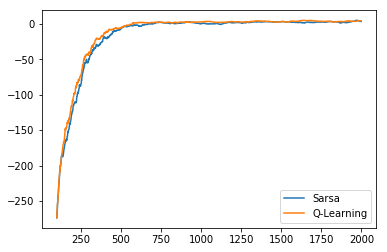

In [92]:
df = pd.DataFrame({"Sarsa": r_sums_sarsa, "Q-Learning": r_sums_q_learning})
df_ma = df.rolling(100, min_periods = 100).mean()
df_ma.iloc[1:2000].plot()

In [71]:
class Agent_lake: 
    def __init__(self, method, start_alpha = 0.3, start_gamma = 0.9, start_epsilon = 0.1):
        self.method = method
        self.env = gym.make('FrozenLake-v0')
        self.n_states = env.observation_space.n
        self.n_actions = self.env.action_space.n
        self.epsilon = start_epsilon
        self.gamma = start_gamma
        self.alpha = start_alpha
        # Set up initial q-table 
        self.q = np.zeros(shape = (env.observation_space.n, self.env.action_space.n))
        # Set up policy pi, init as equiprobable random policy
        self.pi = np.zeros_like(self.q)
        for i in range(self.pi.shape[0]): 
            for a in range(self.n_actions): 
                self.pi[i,a] = 1/self.n_actions
    def simulate_episode(self):
        s = self.env.reset()
        done = False
        r_sum = 0 
        n_steps = 0 
        gam = self.gamma
        while not done: 
            n_steps += 1
            # take action from policy
            x = np.random.random()
            a = np.argmax(np.cumsum(self.pi[s,:]) > x) 
            # take step 
            s_prime,r,done,info = self.env.step(a)    
            if self.method == 'q_learning': 
                a_prime = np.random.choice(np.where(self.q[s_prime] == max(self.q[s_prime]))[0])
                self.q[s,a] = self.q[s,a] + self.alpha * (r + gam*self.q[s_prime,a_prime] - self.q[s,a])
            elif self.method == 'sarsa': 
                a_prime = np.argmax(np.cumsum(self.pi[s_prime,:]) > np.random.random())
                self.q[s,a] = self.q[s,a] + self.alpha * (r + gam*self.q[s_prime,a_prime ] - self.q[s,a])
            # update policy
            best_a = np.random.choice(np.where(self.q[s] == max(self.q[s]))[0])
            for i in range(self.n_actions): 
                if i == best_a:      self.pi[s,i] = 1 - (self.n_actions-1)*(self.epsilon / self.n_actions)
                else:                self.pi[s,i] = self.epsilon / self.n_actions

            # decay gamma close to the end of the episode
            if n_steps > 185: 
                gam *= 0.99999
            s = s_prime
            r_sum += r
        return r_sum

In [97]:
q_learning_agent_lake = Agent_lake(method='q_learning')
r_sums_q_learning_lake = train_agent(q_learning_agent_lake, print_trace=True)

In [98]:
sarsa_agent_lake = Agent_lake(method='sarsa')
r_sums_sarsa_lake = train_agent(sarsa_agent_lake, print_trace=True)

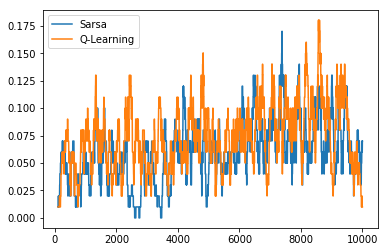

In [99]:
df1 = pd.DataFrame({"Sarsa": r_sums_sarsa_lake, "Q-Learning": r_sums_q_learning_lake})
df_ma1 = df1.rolling(100, min_periods = 100).mean()
df_ma1.iloc[1:100000].plot()